# About the project

## The customer

The customer is a fashion retailer with numerous stores. The dataset consists only of the stationary trades in Germany, summarized over all stores.

## Task description

The fashion retailer want to use his data for:

  * sales volume predictions for articles 
  * optimal price determination of new articles on market launch
  * inventory calculation 
  * general predictions and strategic decision making
  
Such predictions needs a basic population, which serve as a basis for statistical calculations.
Predicting the sales of a specific article on basis of the whole assortment would be too imprecise.
The mean variation is too high, hence the quality of the prediction would be very low.
The multiplicity of articles allows to refer on a more representative population. For an optimal prediction quality, the population should be as big as possible and his mean variation as small as possible. It is possible to create such a population, by grouping articles with similar characteristic attributes to one unit. This can be realized through a clustering algorithm.

## Project goal

The overall goal of the project is to develop a clustering algorithm. This algorithm should be reasonable and statistically established. Further, the cluster building should be done on basis of revenue, article counts or sales quotas of the articles and every article has to be assigned to a cluster.

# Data exploration

First, we want to give an overview of the provided data.
Therefore, we have a look at the raw dataset and 
do some visualization for a better understanding of the data

## Example of raw data

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor import data
from tailor.visualization import *

In [52]:
raw_data = data.load_csv()
raw_data.head(10)

,article_id,transaction_date,markdown_start_date,markdown_end_date,original_price,sells_price,discount,markdown,article_count,season,brand,color,stock_total,avq,Abteilung,WHG,WUG,time_on_sale,revenue
0,900001,2014-03-27,2013-10-18,2014-05-31,59.95,53.95,6.00,0.00,2,Sommer,Fimmilena,mittelbraun,1499,0.13,Abteilung005,WHG021,WUG073,0,107.90
1,900001,2014-03-28,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,2,Sommer,Fimmilena,mittelbraun,1499,0.27,Abteilung005,WHG021,WUG073,1,119.90
2,900001,2014-03-29,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,3,Sommer,Fimmilena,mittelbraun,1499,0.47,Abteilung005,WHG021,WUG073,2,179.85
3,900001,2014-03-31,2013-10-18,2014-05-31,59.95,59.55,0.40,0.00,5,Sommer,Fimmilena,mittelbraun,1499,0.80,Abteilung005,WHG021,WUG073,4,297.75
4,900001,2014-04-01,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,6,Sommer,Fimmilena,mittelbraun,1499,1.20,Abteilung005,WHG021,WUG073,5,359.70
5,900001,2014-04-02,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,4,Sommer,Fimmilena,mittelbraun,1499,1.47,Abteilung005,WHG021,WUG073,6,239.80
6,900001,2014-04-03,2013-10-18,2014-05-31,59.95,58.59,1.36,0.00,4,Sommer,Fimmilena,mittelbraun,1499,1.73,Abteilung005,WHG021,WUG073,7,234.36
7,900001,2014-04-04,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,7,Sommer,Fimmilena,mittelbraun,1499,2.20,Abteilung005,WHG021,WUG073,8,419.65
8,900001,2014-04-05,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,13,Sommer,Fimmilena,mittelbraun,1499,3.07,Abteilung005,WHG021,WUG073,9,779.35
9,900001,2014-04-06,2013-10-18,2014-05-31,59.95,59.95,0.00,0.00,2,Sommer,Fimmilena,mittelbraun,1499,3.20,Abteilung005,WHG021,WUG073,10,119.90


## Feature overview

  * *markdown* is constant for *article_id* and *transaction_date* between *markdown_start_date* and *markdown_end_date*
  * *original_price* is constant for *article_id*
  * *sells_price* is the actual price paid by the customer
  * *sells_price*, *discount* and *markdown* are of the unit [Euro/article]
  * *article_count* denominates the number of sold articles
  * *discount* = *original_price* - *markdown* - *sells_price*
  * *avq* is the current stock divided by *stock_total*

In [53]:
pd.options.display.float_format = "{:.2f}".format
raw_data.describe(include=np.number)

,article_id,original_price,sells_price,discount,markdown,article_count,stock_total,avq,time_on_sale,revenue
count,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00
mean,904359.27,51.33,43.87,2.58,4.88,8.52,2162.84,30.12,87.38,317.27
std,2521.36,22.19,20.50,5.73,9.43,10.84,1960.91,22.89,50.69,385.77
min,900001.00,9.95,-47.96,-99.96,-19.00,1.00,106.00,0.00,0.00,-47.96
25%,902176.00,35.95,29.34,0.00,0.00,2.00,910.00,10.24,44.00,86.28
50%,904338.00,49.95,39.95,0.28,0.00,5.00,1737.00,26.28,86.00,190.95
75%,906569.00,64.95,58.02,2.50,10.00,11.00,2956.00,46.08,130.00,397.12
max,908708.00,179.95,199.91,129.96,90.00,281.00,36396.00,100.25,181.00,13403.60


## Consistency check

### Check if the dataset contains null values

In [70]:
raw_data.isna().values.any()

False

### Detect how many articles are contained in the dataset

In [76]:
len(raw_data['article_id'].unique())

8708

### Get the maximum *time_on_sale* value

In [77]:
raw_data['time_on_sale'].max()

181

### Check, how many articles have less then 181 *time_on_sale* values

In [79]:
tos_test = pd.DataFrame(raw_data.groupby('article_id').apply(lambda x: x.time_on_sale.nunique()))
tos_test.columns = ['number_tos']
len(tos_test.loc[tos_test.number_tos < 181])

8708

To sum up, there are 8708 different articles in the dataset. Non of the articles have 181 *time_on_sale* values. To build consistent series, we have to fill up the lacked values of each series

## Visualization of raw data

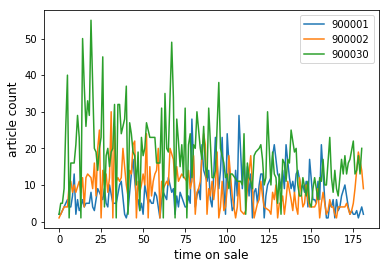

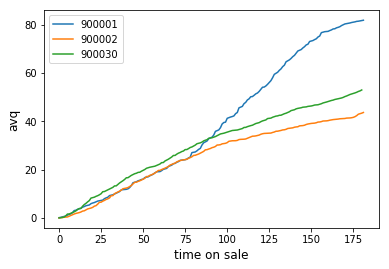

In [60]:
plot_articles(raw_data, [900001, 900002, 900030], 'article_count');
plot_articles(raw_data, [900001, 900002, 900030], 'avq');

# Data processing

For the next step, we process the raw data.
As part of this, we transform the different columns into specific datatypes:

  * *article_id* = category
  * *transaction_date* = datetime
  * *markdown_start_date* = datetime
  * *markdown_end_date* = datetime